In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

Oleh: Cahya Amalinadhi Putra

# Logistic Regression

- Kita akan pakai dataset IRIS
- Lebih rinci pada dataset
  - target 0 adalah spesies Setosa
  - target 1 adalah spesies Virginica
  - target 2 adalah spesies Versicolor

In [2]:
# Load Data Iris
iris = datasets.load_iris()

# Convert ke pandas dataframe agar mudah di edit
iris_df = pd.DataFrame(data=iris.data,
                       columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


- Kita akan coba melakukan binary classification
- Kita akan prediksi bunga **Virginica** & **bukan Virginica**
- Untuk **mempermudah visualisasi**, kita hanya memakai **2 fitur**:
  - **sepal length (cm)**
  - **petal length (cm)**

In [3]:
# Buat prediktor (X)
X = iris_df[['sepal length (cm)', 'petal length (cm)']]

print(X)

     sepal length (cm)  petal length (cm)
0                  5.1                1.4
1                  4.9                1.4
2                  4.7                1.3
3                  4.6                1.5
4                  5.0                1.4
..                 ...                ...
145                6.7                5.2
146                6.3                5.0
147                6.5                5.2
148                6.2                5.4
149                5.9                5.1

[150 rows x 2 columns]


In [4]:
# Buat target (y)
# nilai 1 saat spesies-nya virginica
# nilai 0 saat spesies-nya bukan virginica
y = (iris_df['target']==2).astype(int)

print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: target, Length: 150, dtype: int32


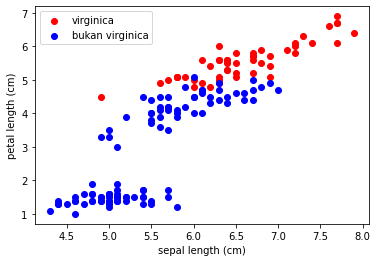

In [6]:
# Visualisasikan data
plt.scatter(X['sepal length (cm)'][y==1], X['petal length (cm)'][y==1],
            c='red', label='virginica')
plt.scatter(X['sepal length (cm)'][y!=1], X['petal length (cm)'][y!=1],
            c='blue', label='bukan virginica')
plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.plot();

- Kita akan buat garis yang memisahkan antara titik merah & biru
- Harapannya seperti garis hitam di bawah ini
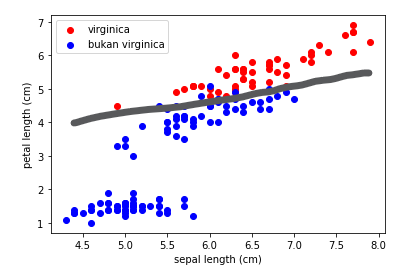

- Garis hitam tersebut kita sebut dengan decision boundary

---
- Bagaimana cara membuat garis nya?
- Misal 
  - `sepal length (cm)` adalah fitur pertama kita, dan kita tulis sebagai $x_1$
  - `petal length (cm)` adalah fitur kedua kita, dan kita tulis sebagai $x_2$
- Maka, persamaan garis tersebut adalah
$$
0 = \theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2}
$$

- dengan $\theta_{0}$, $\theta_{1}$, dan $\theta_{2}$ adalah parameter model yang memengaruhi intercept dan kemiringan garis (decision boundary kita)

---
**Kita menyelesaikan dengan Logistic Regression**

- Untuk objective function, kita akan memaksimalkan negative log-likelihood

- Berikut adalah fungsi negative log-likelihood

$$
\ell (\theta) = - \sum_{i=1}^{N} \left ( y_{i} \log(p(x_{i},\theta)) + (1-y_{i}) \log (1-p(x_{i},\theta)) \right )
$$

- Dengan $p(x_{i},\theta)$ adalah probability dari data $x_{i}$ masuk ke dalam kelas virginica

- $p(x_{i}, \theta)$ sendiri dimodelkan sebagai fungsi Sigmoid ($\sigma(x_{i})$) yang memiliki rentang $\{ 0 \cdots 1 \}$ 

$$
p(x_{i}, \theta) = \sigma(x_{i}, \theta) = \cfrac{1}{1 + \exp(-x_{i}\theta)}
$$

- atau

$$
\sigma(z_{i}) = \cfrac{1}{1 + \exp(-z_{i})}
$$

- dengan

$$
z_{i} = x_{i} \cdot \theta
$$

In [7]:
# Membuat fungsi sigmoid
def sigmoid(z):
    """
    Fungsi sigmoid, outputnya adalah probability terjadinya kelas 1
    diberikan x & theta   
    """
    prob = 1. / (1. + np.exp(-z))
    
    return prob

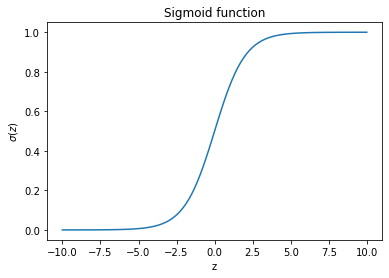

In [9]:
# Test fungsi sigmoid
x_ = np.linspace(-10, 10, 100)
y_ = sigmoid(x_)

# Plot
plt.plot(x_, y_)
plt.xlabel("z")
plt.ylabel("$\sigma(z)$")
plt.title("Sigmoid function")

plt.plot();

In [36]:
# Membuat fungsi log-likelihood
def neg_log_likelihood(X, y, theta):
    """
    Fungsi untuk mencari nilai log likelihood diberikan theta
    """    
    # cari logit
    z = np.column_stack((np.ones(len(y)), X)) @ theta
    
    # hitung probability
    prob = sigmoid(z)
    
    # hitung log likelihood
    l = y*np.log(prob) + (1-y)*np.log(1-prob)
    
    return -np.sum(l)

In [37]:
# Test fungsi log-likelihood
theta_ = np.array([1.00, 1.00, 1.00])
l_ = neg_log_likelihood(X, y, theta_)
l_

933.2326595014376

---
**Untuk menentukan solusi terbaik**

- Kita tidak bisa mendapatkan closed solution (seperti OLS)
- Jadi kita bisa menggunakan informasi gradientnya dan menyelesaikan dengan gradient descent

$$
\nabla_{\theta} \ell (\theta) = \left [ \cfrac{\partial \ell (\theta)}{\partial \theta_{0}} \ , \cfrac{\partial \ell (\theta)}{\partial \theta_{1}} \ , \cfrac{\partial \ell (\theta)}{\partial \theta_{2}} \right ]
$$

- Kita dapat mencari turunannya menggunakan chain rules

$$
\cfrac{\partial \ell (\theta)}{\partial \theta_{i}} = \cfrac{\partial \ell}{\partial \sigma} \cdot \cfrac{\partial \sigma}{\partial z} \cdot \cfrac{\partial z}{\partial \theta_{i}}
$$

- dengan

$$
\cfrac{\partial \ell}{\partial \sigma} = - \left ( y_{i} \cdot \cfrac{1}{\sigma} + (1 - y_{i}) \cdot (-1) \cdot \cfrac{1}{1 - \sigma} \right )
$$

$$
\cfrac{\partial \sigma}{\partial z} = \sigma \cdot (1 - \sigma)
$$

$$
\cfrac{\partial z}{\partial \theta} = \left [ 1 \ , x_{1} \ , x_{2} \right ]
$$

- maka

$$
\nabla_{\theta} \ell = - \sum_{i=1}^{N} \left ( y_{i} - \sigma(z_{i}) \right ) \left [ 1 \ , x_{1}^{(i)} \ , x_{2}^{(i)} \right ]
$$

In [67]:
X

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [80]:
np.sum(np.arange(X.shape[0]) * X['sepal length (cm)'])

69140.9

In [78]:
np.arange(X.shape[0]) @ X

sepal length (cm)    69140.9
petal length (cm)    52081.9
dtype: float64

In [120]:
# Fungsi gradient dari log-likelihood terhadap theta
def neg_log_likelihood_grad(X, y, theta):
    """
    Fungsi untuk mencari gradient dari log likelihood
    """
    # cari logit
    z = np.column_stack((np.ones(len(y)), X)) @ theta
    
    # hitung probability
    prob = sigmoid(z)
    
    # hitung derivative log likelihood
    d_l = (y - prob) @ np.column_stack((np.ones(len(y)), X))
    
    return -d_l

In [121]:
# Test fungsi log-likelihood
theta_ = np.array([1.00, 1.00, 1.00])
d_l_ = neg_log_likelihood_grad(X, y, theta_)
d_l_

array([ 99.9673526 , 546.9403838 , 286.05075446])

- Selanjutnya buat algoritma gradient descent
- Dengan fungsi update sebagai berikut

$$
\theta^{(+)} = \theta^{(-)} - \alpha \cfrac{\partial \ell}{\partial \theta}
$$

In [124]:
# Fungsi gradient descent
def gradient_descent(X, y, theta_init, 
                     learning_rate=1e-4, 
                     max_iter=1000,
                     epsilon=1e-6):
    """
    Fungsi gradient descent untuk log likelihood
    """
    # Initialization
    N = len(y)
    stop_flag = False
    theta_history = []
    l_history = []
    d_l_history = []

    theta_update = theta_init.copy()
    
    # Start iteration
    for i in range(max_iter):
        # Hitung negative log likelihood
        l_i = neg_log_likelihood(X, y, theta_update)
        
        # Hitung derivative of negative log likelihood
        d_l_i = neg_log_likelihood_grad(X, y, theta_update)
        
        # Hitung update dari theta
        theta_update -= learning_rate * d_l_i
        
        # Simpan
        l_history.append(l_i)
        d_l_history.append(d_l_i)
        theta_history.append(theta_update)
        
        if np.abs(d_l_i).all() < epsilon:
            break
            
    return theta_history, l_history, d_l_history

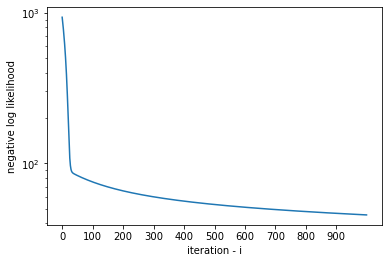

theta best = [ 0.28558974 -1.38271696  1.72677575]
negative log likelihood best = 45.410471548354636


In [127]:
# Find optimum solution
theta_init = np.array([1.0, 1.0, 1.0])
theta_history, l_history, d_l_history = gradient_descent(X, y, theta_init)

# Plot solution
plt.plot(np.arange(len(l_history)), l_history)
plt.yscale('log')
plt.xlabel('iteration - i')
plt.ylabel('negative log likelihood')
plt.xticks([i for i in range(len(l_history)) if i%100==0])
plt.show();

# Print final solution
theta_best = theta_history[-1]
l_best = l_history[-1]
print(f'theta best = {theta_best}')
print(f'negative log likelihood best = {l_best}')

In [143]:
# Buat prediksi
def predict(X, theta,
            threshold=0.5):
    """
    Prediksi
    """
    # cari logit
    z = np.column_stack((np.ones(len(y)), X)) @ theta
    
    # hitung y probability
    y_proba = sigmoid(z)
    
    # hitung y prediksi
    # Kalo probability nya >= 0.5, maka masuk kelas 1, selain itu masuk ke kelas 0
    y_hat = (y_proba >= threshold).astype(int)
    
    return y_hat, y_proba

In [144]:
# Test prediksi
y_hat, y_proba = predict(X, theta_best)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [145]:
# Cek error rate dari confusion matrix
from sklearn.metrics import confusion_matrix

N = len(y)
conf_mat = confusion_matrix(y, y_hat)
print(conf_mat)

error_rate = 1 - (np.diag(conf_mat).sum()/N)
print(f'error rate = {100*error_rate:.2f} %')

[[93  7]
 [ 1 49]]
error rate = 5.33 %


- Hasilnya lumayan, error ratenya cukup kecil hanya 5.33%
- Hasil ini lebih baik dibanding OLS classification sebelumnya

---
**Interpretasi Fisik**

- Kita akan buat 4 grafik
  1. grafik asli (data) - kiri atas
  2. grafik hasil klasifikasi dengan Logistic Regression - kanan atas
  3. grafik missklasifikasi - kiri bawah
  4. grafik decision boundary - kanan bawah

---
- untuk membangun persamaan garis decision boundary, kita asumsikan $x_{2}$ sama dengan $y$ dan $x_{1}$ sama dengan $x$
- kemudian tinggal cari persamaan $y = mx + c$
- maka akan kita dapatkan

$$
\begin{align*}
0 &= \theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} \\ 
\theta_{2} x_{2} &= - \theta_{1} x_{1} - \theta_{0} \\ 
x_{2} &= - \cfrac{\theta_{1}}{\theta_{2}} x_{1} - \cfrac{\theta_{0}}{\theta_{2}}
\end{align*}
$$

- dengan $m = - \cfrac{\theta_{1}}{\theta_{2}}$ dan $c = - \cfrac{\theta_{0}}{\theta_{2}}$

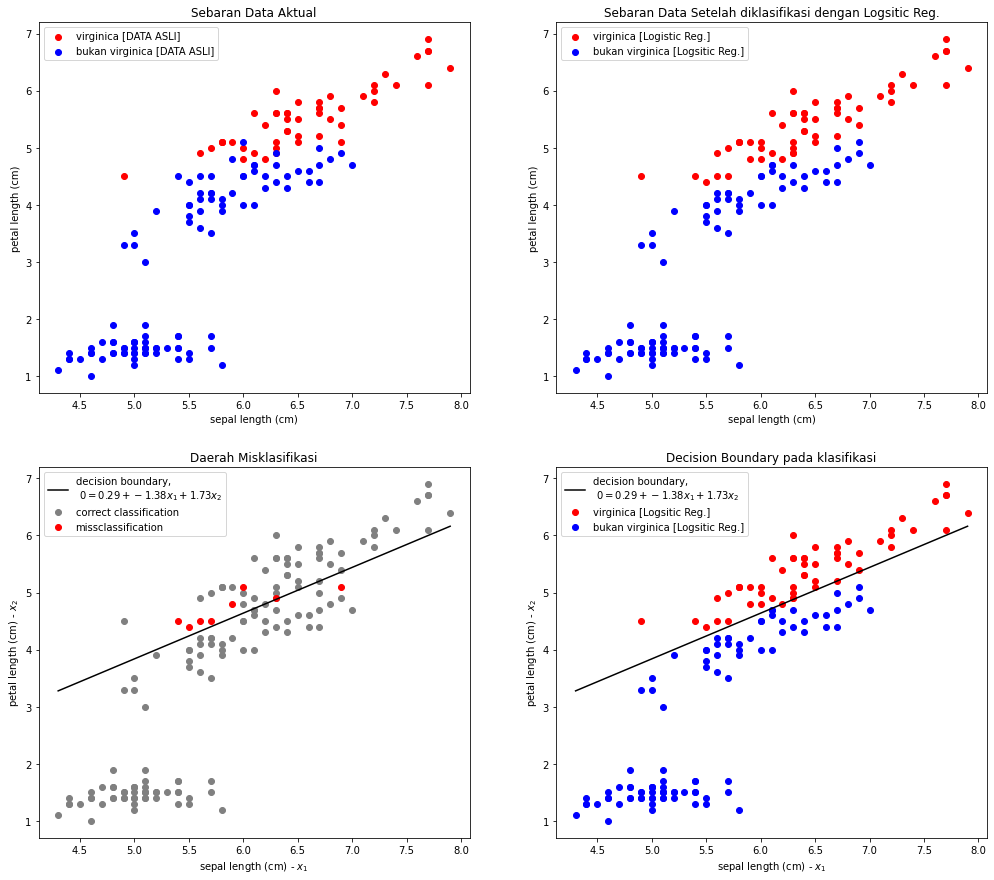

In [147]:
# Perbandingan plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(17,15))

# Visualisasi data awal
ax[0,0].scatter(X['sepal length (cm)'][y==1], X['petal length (cm)'][y==1],
                c='red', label='virginica [DATA ASLI]')
ax[0,0].scatter(X['sepal length (cm)'][y!=1], X['petal length (cm)'][y!=1],
                c='blue', label='bukan virginica [DATA ASLI]')
ax[0,0].legend()
ax[0,0].set_xlabel('sepal length (cm)')
ax[0,0].set_ylabel('petal length (cm)')
ax[0,0].set_title('Sebaran Data Aktual')

# Visualisasi data setelah menggunakan Logsitic Reg.
ax[0,1].scatter(X['sepal length (cm)'][y_hat==1], X['petal length (cm)'][y_hat==1],
                c='red', label='virginica [Logistic Reg.]')
ax[0,1].scatter(X['sepal length (cm)'][y_hat!=1], X['petal length (cm)'][y_hat!=1],
                c='blue', label='bukan virginica [Logsitic Reg.]')
ax[0,1].legend()
ax[0,1].set_xlabel('sepal length (cm)')
ax[0,1].set_ylabel('petal length (cm)')
ax[0,1].set_title('Sebaran Data Setelah diklasifikasi dengan Logsitic Reg.')

# Visualisasi data yang misklasifikasi
m = -theta_best[1]/theta_best[2]
c = -theta_best[0]/theta_best[2]
x_1_support = np.linspace(np.min(X['sepal length (cm)']), np.max(X['sepal length (cm)']), 100)
x_2_support = m * x_1_support + c
ax[1,0].plot(x_1_support, x_2_support, 'k', label=f'decision boundary, \n $0 = {theta_best[0]:.2f} + {theta_best[1]:.2f}x_{1} + {theta_best[2]:.2f}x_{2}$')

ax[1,0].scatter(X['sepal length (cm)'][y==y_hat], X['petal length (cm)'][y==y_hat],
                c='grey', label='correct classification')
ax[1,0].scatter(X['sepal length (cm)'][y!=y_hat], X['petal length (cm)'][y!=y_hat],
                c='red', label='missclassification')
ax[1,0].legend()
ax[1,0].set_xlabel('sepal length (cm) - $x_{1}$')
ax[1,0].set_ylabel('petal length (cm) - $x_{2}$')
ax[1,0].set_title('Daerah Misklasifikasi')

# Visualisasi decision boundary
# Garis berbentuk
# x_2 = m x_1 + c
m = -theta_best[1]/theta_best[2]
c = -theta_best[0]/theta_best[2]
x_1_support = np.linspace(np.min(X['sepal length (cm)']), np.max(X['sepal length (cm)']), 100)
x_2_support = m * x_1_support + c
ax[1,1].plot(x_1_support, x_2_support, 'k', label=f'decision boundary, \n $0 = {theta_best[0]:.2f} + {theta_best[1]:.2f}x_{1} + {theta_best[2]:.2f}x_{2}$')
ax[1,1].scatter(X['sepal length (cm)'][y_hat==1], X['petal length (cm)'][y_hat==1],
              c='red', label='virginica [Logsitic Reg.]')
ax[1,1].scatter(X['sepal length (cm)'][y_hat!=1], X['petal length (cm)'][y_hat!=1],
              c='blue', label='bukan virginica [Logsitic Reg.]')
ax[1,1].legend()
ax[1,1].set_xlabel('sepal length (cm) - $x_{1}$')
ax[1,1].set_ylabel('petal length (cm) - $x_{2}$')
ax[1,1].set_title('Decision Boundary pada klasifikasi')

plt.plot();

Dari 4 grafik di atas didapatkan:
- Adanya misklasifikasi
- Ini wajar, karena: 
  - data aslinya tidak sepenuhnya terpisah
  - garis pemisah kita masih berupa garis lurus
- Daerah misklasifikasi tepat di daerah yang tidak sepenuhnya terpisah
- Semua yang ada di bawah garis decision boundary, menjadi class `bukan virginica`
- Sedangkan semua yang ada di atas garis decision boundary, menjadi class `virginica`